In [27]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

#### Importing Modules from Local Directory

In [28]:
project_root = os.path.abspath('..')

# Adding the project root to my system path
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_loader import telco_data_loader
from src.data_processor import telcoDataCleaner

#### Loading Raw Data from Kaggle

In [3]:
# running the loader
raw_telco_data = telco_data_loader()

src.data_loader - Starting download of telco data
src.data_loader - Telco data download successful
src.data_loader - CSV data downloaded successfully


## Initial Data Exploration

In [4]:
print(f"Dataframe shape: {raw_telco_data.shape}")
print(f"Dataframe columns: {raw_telco_data.columns}")
print(raw_telco_data.info())

Dataframe shape: (7043, 21)
Dataframe columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   obj

#### Cleaning up the data for visualization

In [5]:
cleaner = telcoDataCleaner()

cleaned_data = cleaner.clean_data(raw_telco_data)['clean_table']

src.data_processor - Binary columns converted
src.data_processor - Converting gender
src.data_processor - Converting Internet Service
src.data_processor - Data types successfully converted
src.data_processor - Outlier Summary: {}
src.data_processor - Columns with missing values: {'OnlineSecurity': np.int64(1526), 'DeviceProtection': np.int64(1526), 'TechSupport': np.int64(1526), 'StreamingTV': np.int64(1526), 'StreamingMovies': np.int64(1526), 'TotalCharges': np.int64(11)}
src.data_processor - Filled missing values in TotalCharges with medians
src.data_processor - Filled missing values in Churn with medians


#### Plotting

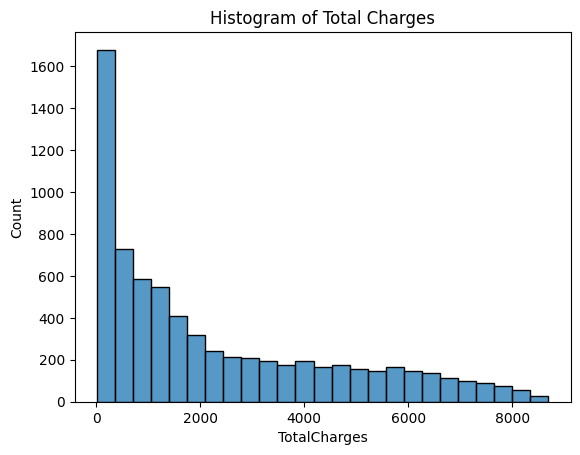

In [6]:
sns.histplot(data = cleaned_data, x = 'TotalCharges')
plt.title("Histogram of Total Charges")
plt.show()

In [7]:
#print(cleaned_data.describe())

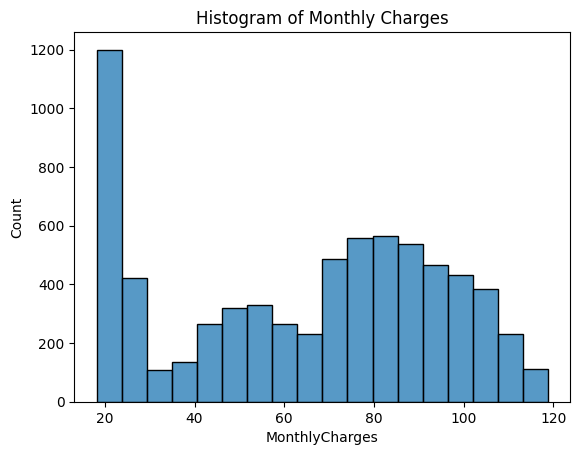

In [8]:
sns.histplot(data = cleaned_data, x = 'MonthlyCharges')
plt.title("Histogram of Monthly Charges")
plt.show()

Appears to be a trimodal distribution: a cluster of monthly charges around $20, another group around $50, and a final around $80

In [9]:
cleaned_data.loc[:, ['TechSupport', 'Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
0.0,0.416355
1.0,0.151663


In [10]:
cleaned_data.loc[:, ['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [11]:
cleaned_data.loc[:, ['SeniorCitizen', 'MonthlyCharges']].groupby('SeniorCitizen').mean()

,MonthlyCharges
SeniorCitizen,
0,61.847441
1,79.820359


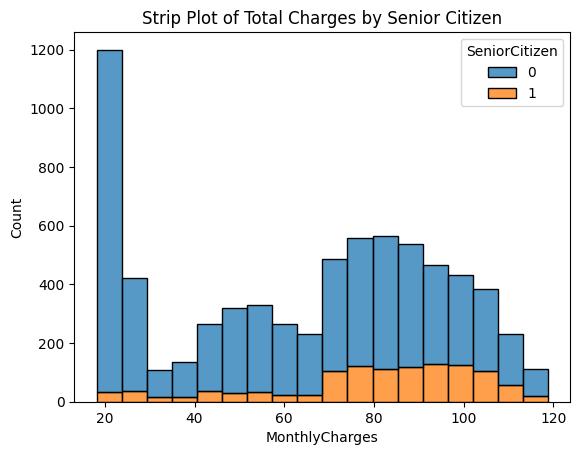

In [12]:
sns.histplot(data = cleaned_data,
             x = 'MonthlyCharges',
             hue = 'SeniorCitizen',
             multiple = 'stack')
plt.title('Strip Plot of Total Charges by Senior Citizen')
plt.show()

In [13]:
cleaned_data.loc[:, ['tenure', 'Churn']].groupby('Churn').mean()

,tenure
Churn,
0,37.569965
1,17.979133


In [14]:
cleaned_data.loc[:, ['StreamingMovies', 'Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
0.0,0.336804
1.0,0.299414


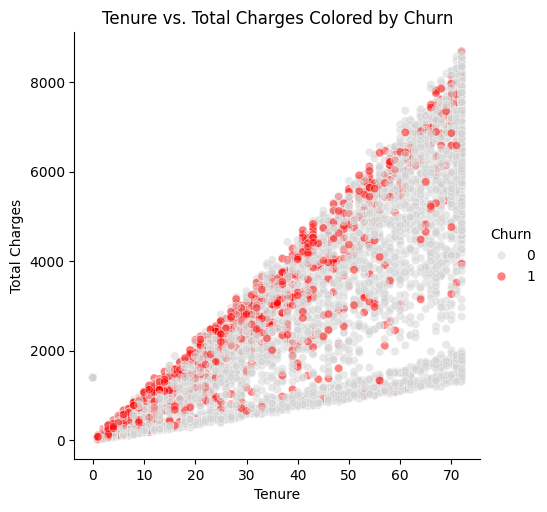

In [15]:
sns.relplot(data = cleaned_data,
            x = 'tenure',
            y = 'TotalCharges',
            hue = 'Churn',
            palette = {1 : 'red', 0 : 'lightgrey'},
            alpha = 0.5)
plt.title("Tenure vs. Total Charges Colored by Churn")
plt.ylabel("Total Charges")
plt.xlabel("Tenure")
plt.show()

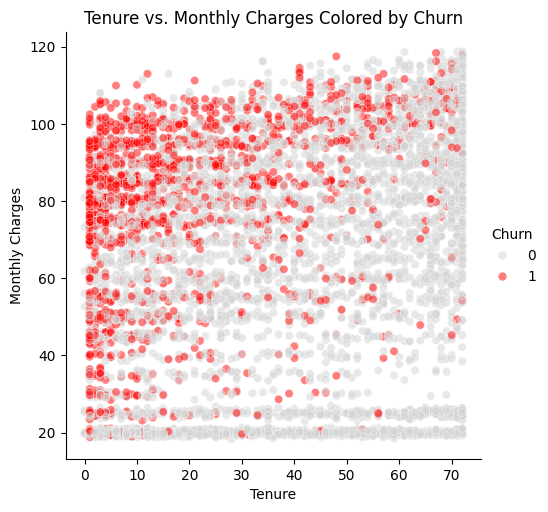

In [16]:
sns.relplot(cleaned_data,
            x = 'tenure',
            y = 'MonthlyCharges',
            hue = 'Churn',
            palette = {1 : 'red', 0 : 'lightgrey'},
            alpha = 0.5)
plt.title("Tenure vs. Monthly Charges Colored by Churn")
plt.ylabel("Monthly Charges")
plt.xlabel("Tenure")
plt.show()

matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


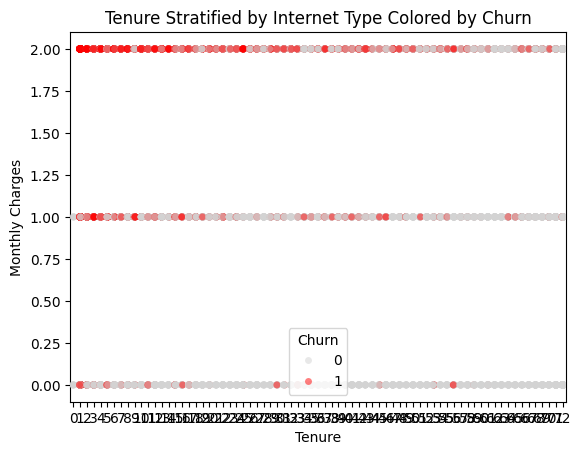

In [21]:
sns.stripplot(cleaned_data,
            x = 'tenure',
            y = 'InternetService',
            hue = 'Churn',
            palette = {1 : 'red', 0 : 'lightgrey'},
            alpha = 0.5)
plt.title("Tenure Stratified by Internet Type Colored by Churn")
plt.ylabel("Monthly Charges")
plt.xlabel("Tenure")
plt.show()

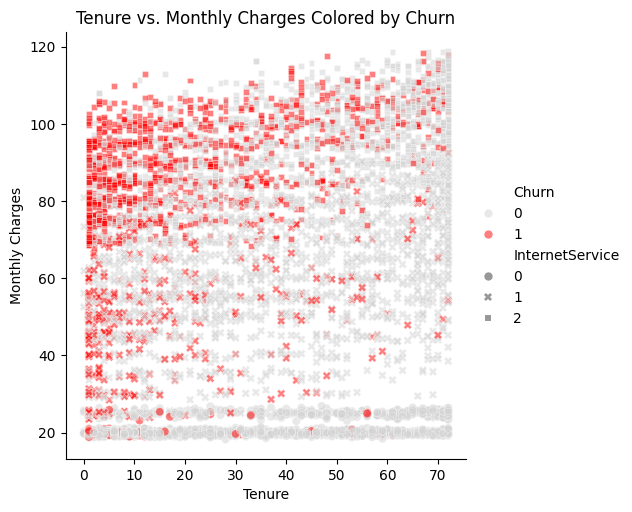

In [26]:
# Scatterplot of tenure vs monthly charges colored by churn and styled by internet service
sns.relplot(cleaned_data,
            x = 'tenure',
            y = 'MonthlyCharges',
            hue = 'Churn',
            style = 'InternetService',
            palette = {1 : 'red', 0 : 'lightgrey'},
            alpha = 0.5)
plt.title("Tenure vs. Monthly Charges Colored by Churn")
plt.ylabel("Monthly Charges")
plt.xlabel("Tenure")
plt.show()

Observations: 
 - Customers being charged the most are the most likely to churn
 - New customers are the most likely to churn
 - Fiber optic customers are most likely to churn. However, fiber optic customers tend to have the highest monthly charges